# Mini Project: Detect Red & Black Colors
# Using OpenCV + HSV Color Space

## Objective  
In this exercise, you'll learn how to detect **specific colors (red and black)** from a real street image  
using **OpenCV** and the **HSV (Hue–Saturation–Value)** color model.  

Color detection is a fundamental skill in **Computer Vision**,  
especially in applications such as:
-  **Autonomous Driving** (detecting traffic lights, road lanes, vehicles)
-  **Navigation Systems**
- **Image Filtering and Object Segmentation**

##  How It Works

1. **Image Loading** – Load a real image from the internet using its URL.  
2. **Color Conversion** – Convert the image from `BGR` (OpenCV default) to `HSV`,  
   because HSV separates color (Hue) from brightness (Value).  
3. **Color Ranges** – Define value ranges for red and black colors.  
4. **Masking** – Create binary masks for each color, where white = detected color.  
5. **Combining Masks** – Merge both red and black masks into a single one.  
6. **Applying the Mask** – Use the mask to extract only the desired colors from the original image.  
7. **Visualization** – Display all results neatly in a 3-image grid.

/tmp/ipython-input-949520105.py:72: UserWarning: Glyph 128248 (\N{CAMERA WITH FLASH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-949520105.py:72: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-949520105.py:72: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128248 (\N{CAMERA WITH FLASH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)

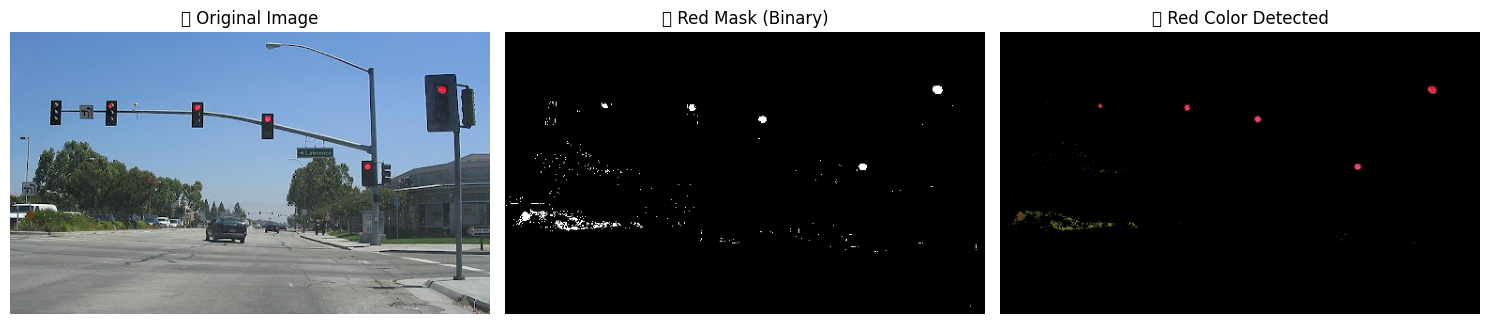

In [ ]:
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow  # Optional (for quick checks)

# URL of the image
#url = "https://images.pexels.com/photos/9735306/pexels-photo-9735306.jpeg"
#url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQFKDPuAlL9ZjZY1jwlE0RondJ3VCydTJTNwA&s"
# url = "https://lh3.googleusercontent.com/proxy/TcREkgp1uvyCyFVeJ5oe_ljzTGG2lzO5i6HPR-ISDdtVXg0mTxKjSMek3-ZrkxinQZxcHWt4Yceiyr5QtRg4oYCI1S92ZkHw4kuNM1K4pPh5vvZMqA"
url ="https://www.sinai.news/wp-content/uploads/2024/03/%D8%A5%D8%B4%D8%A7%D8%B1%D8%A9-%D8%A7%D9%84%D9%85%D8%B1%D9%88%D8%B1.webp"
try:
    # Download the image from the internet
    response = requests.get(url, timeout=10)
    response.raise_for_status()
    image_array = np.frombuffer(response.content, dtype=np.uint8)
    img = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
except requests.exceptions.RequestException as e:
    print(f"⚠️ Failed to download image: {e}")
    exit()

#  Check if image was loaded successfully
if img is None:
    print("⚠️ OpenCV couldn't decode the image.")
    exit()


# 2️ Define the red color ranges (Hue 0–10 and 170–180)
# -- The HSV space separates Hue (H), Saturation (S), and Value (V), which makes color detection easier

# 1️ Convert from BGR (OpenCV default) to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# -- Define the color ranges we want to detect
# -- The array follows the order: [Hue, Saturation, Value]
# --- Red Color Range: It has two parts because its color is on both ends of the circular Hue scale
lower_red1 = np.array([0, 120, 0])
upper_red1 = np.array([75, 255, 255])
lower_red2 = np.array([170, 120, 40])
upper_red2 = np.array([180, 255, 255])

# 3️ Create and combine the masks
mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
red_mask = cv2.bitwise_or(mask1, mask2)

# 4️ Apply the mask to the original image
red_detected = cv2.bitwise_and(img, img, mask=red_mask)

# Note: Matplotlib uses RGB instead of BGR
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
red_detected_rgb = cv2.cvtColor(red_detected, cv2.COLOR_BGR2RGB)

# 5️ Display results in a clean grid
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title("📸 Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(red_mask, cmap='gray')
plt.title("🎯 Red Mask (Binary)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(red_detected_rgb)
plt.title("🔴 Red Color Detected")
plt.axis('off')

plt.tight_layout()
plt.show()


/tmp/ipython-input-2278710303.py:74: UserWarning: Glyph 128248 (\N{CAMERA WITH FLASH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2278710303.py:74: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2278710303.py:74: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128248 (\N{CAMERA WITH FLASH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


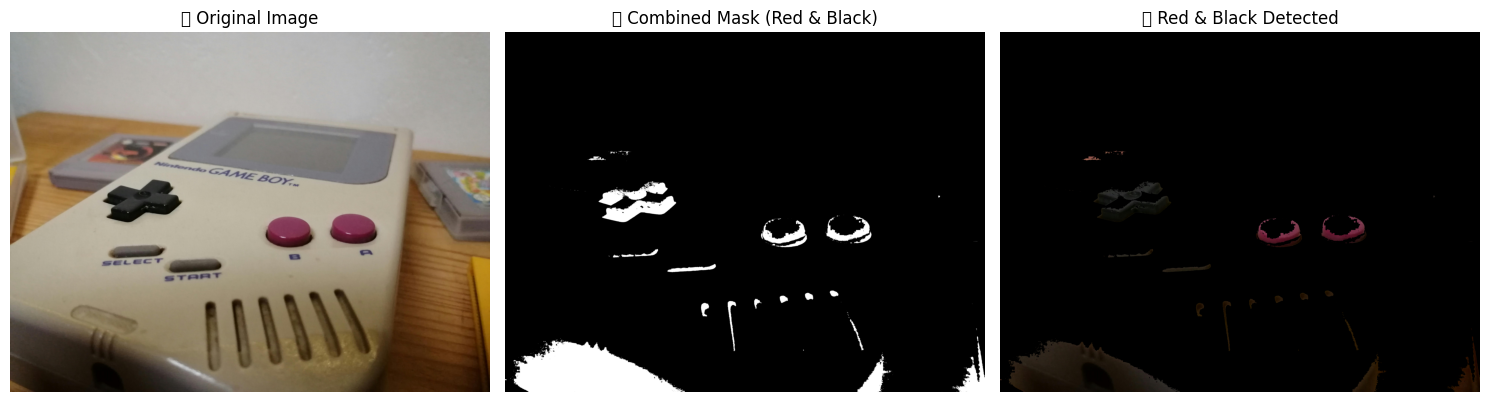

In [ ]:
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt

#  Image URL
url = "https://images.pexels.com/photos/9735306/pexels-photo-9735306.jpeg"

try:
    response = requests.get(url, timeout=10)
    response.raise_for_status()
    image_array = np.frombuffer(response.content, dtype=np.uint8)
    img = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
except requests.exceptions.RequestException as e:
    print(f"⚠️ Failed to download image: {e}")
    exit()

# Check if image was loaded successfully
if img is None:
    print("⚠️ Could not decode image.")
    exit()

# 1️ Convert from BGR to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# 2️ Define color ranges
# --- Red color range (has two parts)
lower_red1 = np.array([0, 120, 70])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 120, 70])
upper_red2 = np.array([180, 255, 255])

# --- Black color range (based on low brightness)
lower_black = np.array([0, 0, 0])
upper_black = np.array([180, 255, 50])

# 3️ Create masks
# --- Red mask (combine both red ranges)
mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)
red_mask = cv2.bitwise_or(mask_red1, mask_red2)

# --- Black mask
black_mask = cv2.inRange(hsv, lower_black, upper_black)

#  Combine both masks
combined_mask = cv2.bitwise_or(red_mask, black_mask)

# 4️ Apply the combined mask to the original image
detected_colors = cv2.bitwise_and(img, img, mask=combined_mask)

#  Convert BGR → RGB for matplotlib visualization
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
detected_colors_rgb = cv2.cvtColor(detected_colors, cv2.COLOR_BGR2RGB)

# 5️ Display results in a 3-image grid
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title("📸 Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(combined_mask, cmap='gray')
plt.title("🎯 Combined Mask (Red & Black)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(detected_colors_rgb)
plt.title("🎨 Red & Black Detected")
plt.axis('off')

plt.tight_layout()
plt.show()